# Turbofan Engine - Data set: FD001
## Data Exploration
- 100 train trajectories, run to failure
- 100 test trajectories, the recording stops prior to the failure
- RUL values for the test set are available
- One operation condition
- One failure mode: HPC Degradation

In [44]:
# libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [3]:
# functions
def import_(train, test, RUL):
    """function to import the data, the inputs are the names of the files in string format
    the output, 3 datasets, with column names and the all NaN value columns removed"""
    
    train = pd.read_csv("data/" + train, sep=" ", header = None)
    train.drop(train.columns[27], axis=1, inplace=True)
    train.drop(train.columns[26], axis=1, inplace=True)
    train.columns = ["unit_number", "n_cycles", "op_setting_1", "op_setting_2", "op_setting_3", 
                "sm_1", "sm_2", "sm_3","sm_4", "sm_5", "sm_6", "sm_7", "sm_8","sm_9", "sm_10", "sm_11", "sm_12", 
                "sm_13","sm_14", "sm_15", "sm_16", "sm_17", "sm_18","sm_19", "sm_20", "sm_21"]
    
    test = pd.read_csv("data/" + test, sep=" ", header = None)
    test.drop(test.columns[27], axis=1, inplace=True)
    test.drop(test.columns[26], axis=1, inplace=True)
    test.columns = ["unit_number", "n_cycles", "op_setting_1", "op_setting_2", "op_setting_3", 
                "sm_1", "sm_2", "sm_3","sm_4", "sm_5", "sm_6", "sm_7", "sm_8","sm_9", "sm_10", "sm_11", "sm_12", 
                "sm_13","sm_14", "sm_15", "sm_16", "sm_17", "sm_18","sm_19", "sm_20", "sm_21"]
    
    RUL = pd.read_csv("data/" + RUL, sep=" ", header = None)
    RUL.drop(RUL.columns[1], axis=1, inplace=True)
    RUL.columns = ["RUL"]
    
    return train, test, RUL

In [4]:
train, test, RUL = import_("train_FD001.txt", "test_FD001.txt", "RUL_FD001.txt")

## Train test

In [48]:
train.head()

,unit_number,n_cycles,op_setting_1,op_setting_2,op_setting_3,sm_1,sm_2,sm_3,sm_4,sm_5,...,sm_12,sm_13,sm_14,sm_15,sm_16,sm_17,sm_18,sm_19,sm_20,sm_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [51]:
train.isna().sum()

unit_number     0
n_cycles        0
op_setting_1    0
op_setting_2    0
op_setting_3    0
sm_1            0
sm_2            0
sm_3            0
sm_4            0
sm_5            0
sm_6            0
sm_7            0
sm_8            0
sm_9            0
sm_10           0
sm_11           0
sm_12           0
sm_13           0
sm_14           0
sm_15           0
sm_16           0
sm_17           0
sm_18           0
sm_19           0
sm_20           0
sm_21           0
dtype: int64

In [20]:
units = train["unit_number"].unique()
print("N units:", len(units))

N units: 100


In [16]:
op_settings = train.columns[2:5]
round(train[op_settings].describe(), 3)

,op_setting_1,op_setting_2,op_setting_3
count,20631.000,20631.000,20631.0
mean,-0.000,0.000,100.0
std,0.002,0.000,0.0
min,-0.009,-0.001,100.0
25%,-0.002,-0.000,100.0
50%,0.000,0.000,100.0
75%,0.002,0.000,100.0
max,0.009,0.001,100.0


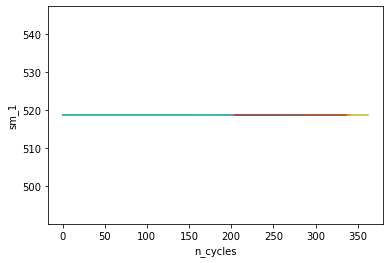

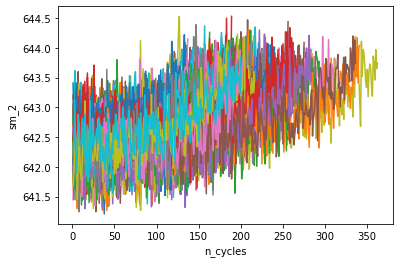

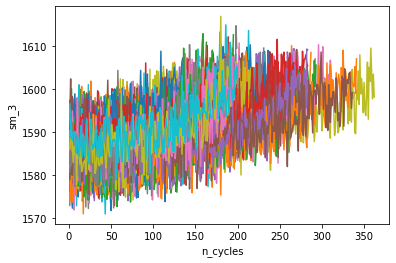

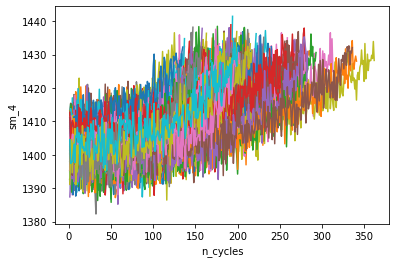

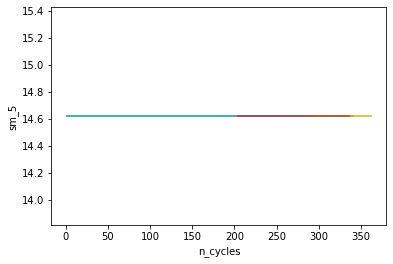

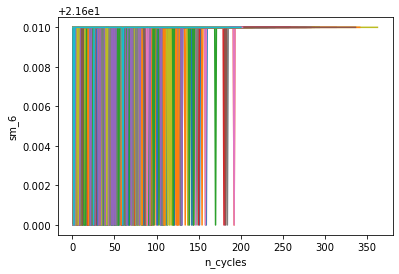

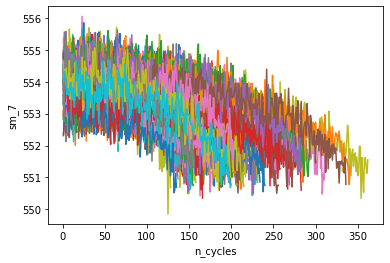

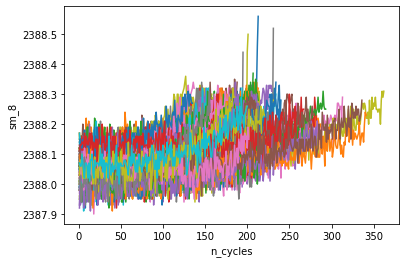

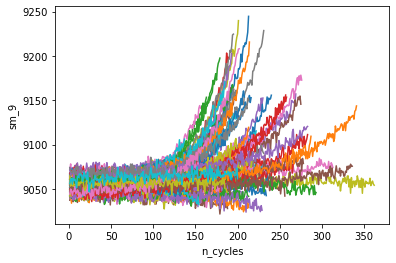

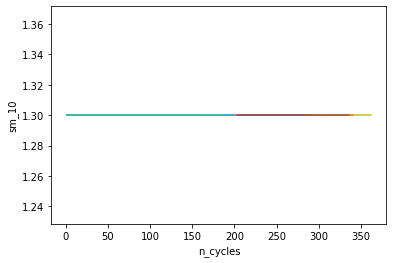

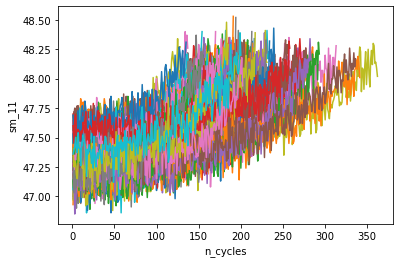

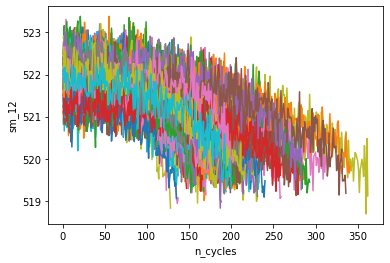

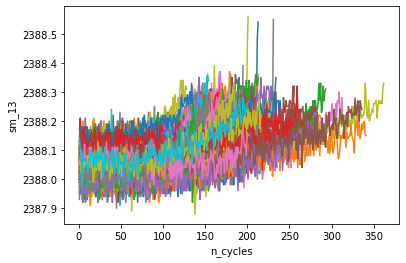

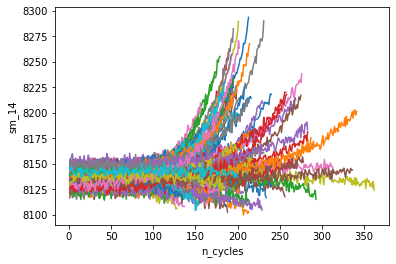

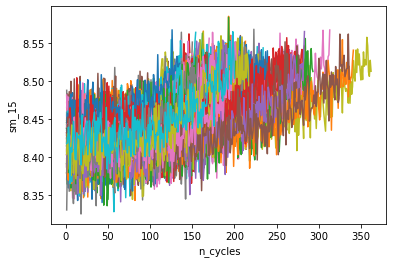

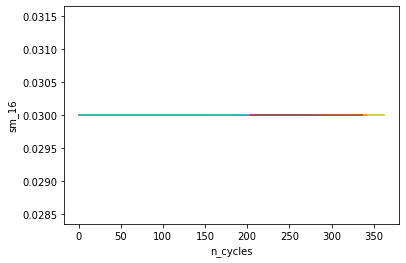

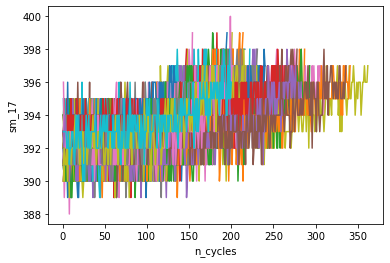

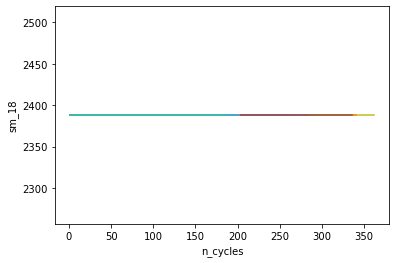

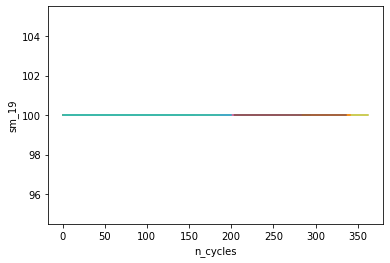

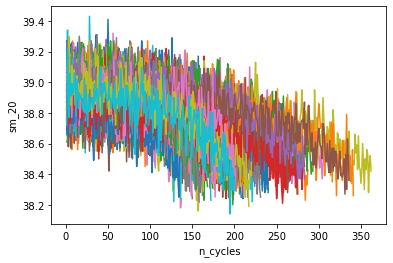

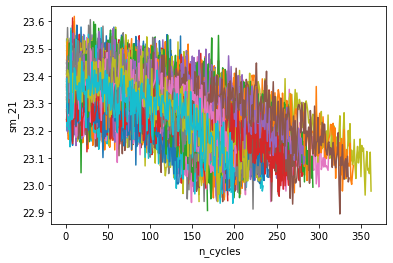

In [46]:
sensors = train.columns[5::]

for sm in sensors:

    for unit in units:
        x = train[train["unit_number"]==unit]["n_cycles"].values
        y = train[train["unit_number"]==unit][sm].values
        plt.plot(x, y)

    plt.xlabel("n_cycles")
    plt.ylabel(sm)
    plt.savefig("plots\FD001"+str(sm)+".png", bbox_inches = "tight")
    plt.show()

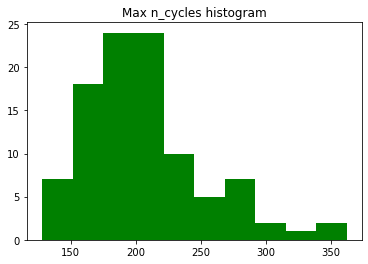

In [47]:
plt.hist(train.groupby(['unit_number'], sort=False)['n_cycles'].max().values, color = "g")
plt.title("Max n_cycles histogram")
plt.savefig("plots\FD001hist.png", bbox_inches = "tight")
plt.show()

## Test set

In [28]:
test.head()

,unit_number,n_cycles,op_setting_1,op_setting_2,op_setting_3,sm_1,sm_2,sm_3,sm_4,sm_5,...,sm_12,sm_13,sm_14,sm_15,sm_16,sm_17,sm_18,sm_19,sm_20,sm_21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130


In [32]:
round(test.describe(), 3)

,unit_number,n_cycles,op_setting_1,op_setting_2,op_setting_3,sm_1,sm_2,sm_3,sm_4,sm_5,...,sm_12,sm_13,sm_14,sm_15,sm_16,sm_17,sm_18,sm_19,sm_20,sm_21
count,13096.000,13096.000,13096.000,13096.000,13096.0,13096.00,13096.000,13096.000,13096.000,13096.00,...,13096.000,13096.000,13096.000,13096.000,13096.00,13096.000,13096.0,13096.0,13096.000,13096.000
mean,51.544,76.837,-0.000,0.000,100.0,518.67,642.475,1588.099,1404.735,14.62,...,521.748,2388.071,8138.948,8.426,0.03,392.572,2388.0,100.0,38.893,23.336
std,28.289,53.058,0.002,0.000,0.0,0.00,0.401,5.003,6.688,0.00,...,0.560,0.057,10.189,0.029,0.00,1.234,0.0,0.0,0.142,0.084
min,1.000,1.000,-0.008,-0.001,100.0,518.67,641.130,1569.040,1384.390,14.62,...,519.380,2387.890,8108.500,8.333,0.03,389.000,2388.0,100.0,38.310,22.935
25%,28.000,33.000,-0.002,-0.000,100.0,518.67,642.198,1584.600,1399.950,14.62,...,521.380,2388.030,8132.310,8.406,0.03,392.000,2388.0,100.0,38.800,23.282
50%,52.000,69.000,0.000,0.000,100.0,518.67,642.460,1587.990,1404.440,14.62,...,521.780,2388.070,8138.390,8.425,0.03,393.000,2388.0,100.0,38.900,23.339
75%,76.000,113.000,0.002,0.000,100.0,518.67,642.740,1591.362,1409.050,14.62,...,522.150,2388.110,8144.360,8.444,0.03,393.000,2388.0,100.0,38.990,23.394
max,100.000,303.000,0.008,0.001,100.0,518.67,644.300,1607.550,1433.360,14.62,...,523.760,2388.320,8220.480,8.541,0.03,397.000,2388.0,100.0,39.410,23.642


In [52]:
test.isna().sum()

unit_number     0
n_cycles        0
op_setting_1    0
op_setting_2    0
op_setting_3    0
sm_1            0
sm_2            0
sm_3            0
sm_4            0
sm_5            0
sm_6            0
sm_7            0
sm_8            0
sm_9            0
sm_10           0
sm_11           0
sm_12           0
sm_13           0
sm_14           0
sm_15           0
sm_16           0
sm_17           0
sm_18           0
sm_19           0
sm_20           0
sm_21           0
dtype: int64

In [33]:
RUL.head()

,RUL
0,112
1,98
2,69
3,82
4,91
